# Lab lesson 2 - CNN & transfer learning

In [1]:
import matplotlib.pyplot as plt
# utils display function 
def display_history(history):
  loss_train=history.history["loss"]
  acc_train=history.history["accuracy"]

  loss_val=history.history["val_loss"]
  acc_val=history.history["val_accuracy"]

  # plot 
  plt.plot(loss_train)
  plt.plot(loss_val)
  plt.title("train and val losses")
  plt.legend(["Training", "Validation"])
  plt.xlabel("epoch")
  plt.show()

  plt.plot(acc_train)
  plt.plot(acc_val)
  plt.title("train and val accuracy")
  plt.xlabel("epoch")
  plt.legend(["Training", "Validation"])
  plt.show()


Data download and extract


In [2]:
!wget "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
!tar -xf flower_photos.tgz

--2023-04-04 09:58:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  23.4MB/s    in 10s     

2023-04-04 09:58:44 (21.3 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [3]:
# usa api tf.data.Dataset per lavorare più efficientemente con i dati

import tensorflow as tf
seed=43
d=180
data= tf.keras.utils.image_dataset_from_directory("/content/flower_photos", image_size=(180, 180), seed=43, validation_split=0.2, subset="both" )
train_data, val_data=data


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


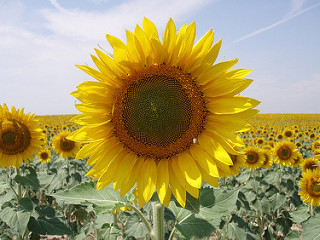

In [4]:
import PIL #allows to display images at a viewable level
PIL.Image.open("/content/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg")


# modelling

In [5]:
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
def create_model(input_shape, out_shape):
  input=Input(shape=input_shape) #first input layer
  r=Rescaling(1./255)(input) #rescaling to shrink the image (ease processing, look on a wider section of the image)
  #convolution
  conv_1=Conv2D(16, 3, padding="same", activation="relu")(r) #convolutional layer, with a kernel size of 16, with relu activation (more precise to extract features)
  p1=MaxPooling2D((2,2))(conv_1) #after conv layers is usally used a pooling layer
  conv_2=Conv2D(32,3, padding="same", activation="relu")(p1)
  p2=MaxPooling2D((2,2))(conv_2)
  conv_3=Conv2D(64,3, padding="same", activation="relu")(p2)
  p3=MaxPooling2D((2,2))(conv_3)
  #flattening
  f=Flatten()(p3)
  d=Dense(out_shape,activation="softmax")(f)
  model=Model(input,d)
  model.summary()
  return model

model=create_model(input_shape=(d,d, 3), out_shape=5)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                         

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(1e-3), 
              metrics=["accuracy"], 
              loss=SparseCategoricalCrossentropy(from_logits=True))
history=model.fit(train_data,epochs=10, validation_data=val_data)


Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 17s 63ms/step - loss: 1.3814 - accuracy: 0.3985 - val_loss: 1.1272 - val_accuracy: 0.5313
Epoch 2/10
92/92 [==============================] - 7s 70ms/step - loss: 1.0444 - accuracy: 0.5807 - val_loss: 1.0366 - val_accuracy: 0.5954
Epoch 3/10
92/92 [==============================] - 7s 71ms/step - loss: 0.8803 - accuracy: 0.6723 - val_loss: 0.9771 - val_accuracy: 0.6253
Epoch 4/10
92/92 [==============================] - 6s 65ms/step - loss: 0.7087 - accuracy: 0.7391 - val_loss: 1.0310 - val_accuracy: 0.6090
Epoch 5/10
92/92 [==============================] - 7s 69ms/step - loss: 0.5489 - accuracy: 0.8021 - val_loss: 1.1338 - val_accuracy: 0.6172
Epoch 6/10
92/92 [==============================] - 5s 56ms/step - loss: 0.3912 - accuracy: 0.8672 - val_loss: 1.2376 - val_accuracy: 0.6131
Epoch 7/10
92/92 [==============================] - 6s 57ms/step - loss: 0.2641 - accuracy: 0.9142 - val_loss: 1.3591 - val_accuracy: 0.6253
Epoch 8/10
92/92 [=====

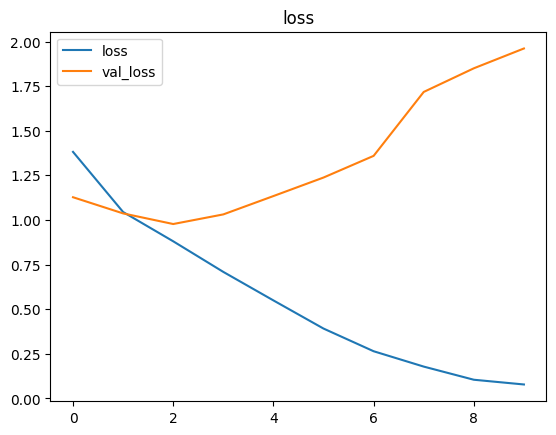

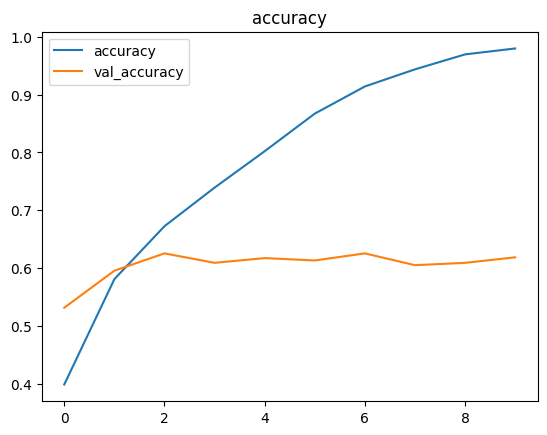

In [7]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()
plt.show()

plt.title("accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

the above model overfits on validation data
# Overfitting removing techniques
## Dropout
It's just a layr in keras.
It must be put between layers that have training information (NOT after the input!)

Note that dropouts removes information, so in this small networks the rate should be small (max 0.2)
## Data Augmentation
modifying training dataset to add "new" datapoints which the model actually considers as new. For example rotating, scaling, flipping, ...<br>
In keras there are layers that performs data augmentaton by automatically randomizing those transformations

In [8]:
# DATA AUGMENTATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
data_aug_model=Sequential([RandomFlip("horizontal", input_shape=(d,d,3)),
                           RandomRotation(0.1),
                           RandomZoom(0.1)])

In [9]:
from tensorflow.keras.layers import Dropout

def create_enhanced_model(input_shape, out_shape):
  input=Input(shape=input_shape) #first input layer
  # DATA AUGMENTATION
  aug=data_aug_model(input)
  r=Rescaling(1./255)(aug) #rescaling to shrink the image (ease processing, look on a wider section of the image)
  #convolution
  conv_1=Conv2D(16, 3, padding="same", activation="relu")(r) #convolutional layer, with a kernel size of 16, with relu activation (more precise to extract features)
  p1=MaxPooling2D((2,2))(conv_1) #after conv layers is usally used a pooling layer
  conv_2=Conv2D(32,3, padding="same", activation="relu")(p1)
  p2=MaxPooling2D((2,2))(conv_2)
  conv_3=Conv2D(64,3, padding="same", activation="relu")(p2)
  p3=MaxPooling2D((2,2))(conv_3)
  # DROPOUT
  dropout= Dropout(0.2)(p3)
  #flattening
  f=Flatten()(p3)
  d=Dense(out_shape,activation="softmax")(f)
  model=Model(input,d)
  model.summary()
  return model

model_enhanced= create_enhanced_model(input_shape=(d,d, 3), out_shape=5)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                           

In [10]:
model_enhanced.compile(optimizer=Adam(1e-3), 
              metrics=["accuracy"], 
              loss=SparseCategoricalCrossentropy(from_logits=True))
history2=model_enhanced.fit(train_data,epochs=10, validation_data=val_data)

Epoch 1/10
92/92 [==============================] - 9s 62ms/step - loss: 1.3086 - accuracy: 0.4452 - val_loss: 1.1480 - val_accuracy: 0.5368
Epoch 2/10
92/92 [==============================] - 7s 70ms/step - loss: 1.0663 - accuracy: 0.5783 - val_loss: 1.0713 - val_accuracy: 0.5763
Epoch 3/10
92/92 [==============================] - 6s 59ms/step - loss: 0.9779 - accuracy: 0.6172 - val_loss: 0.9644 - val_accuracy: 0.6240
Epoch 4/10
92/92 [==============================] - 7s 70ms/step - loss: 0.9026 - accuracy: 0.6529 - val_loss: 0.8956 - val_accuracy: 0.6553
Epoch 5/10
92/92 [==============================] - 6s 61ms/step - loss: 0.8436 - accuracy: 0.6761 - val_loss: 0.8706 - val_accuracy: 0.6894
Epoch 6/10
92/92 [==============================] - 7s 71ms/step - loss: 0.8078 - accuracy: 0.6965 - val_loss: 0.8438 - val_accuracy: 0.6853
Epoch 7/10
92/92 [==============================] - 6s 60ms/step - loss: 0.7643 - accuracy: 0.7091 - val_loss: 0.7856 - val_accuracy: 0.7193
Epoch 8/10
92

The model now is not overfitting in those 10 epochs

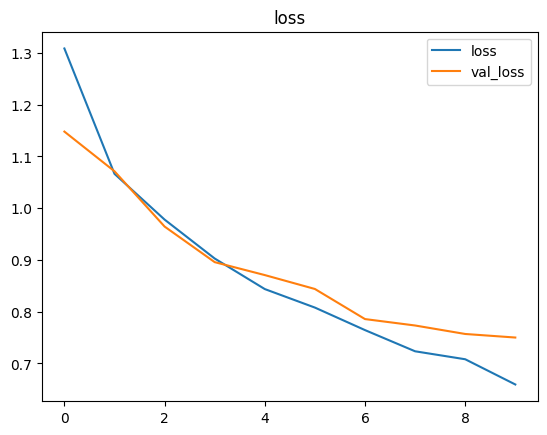

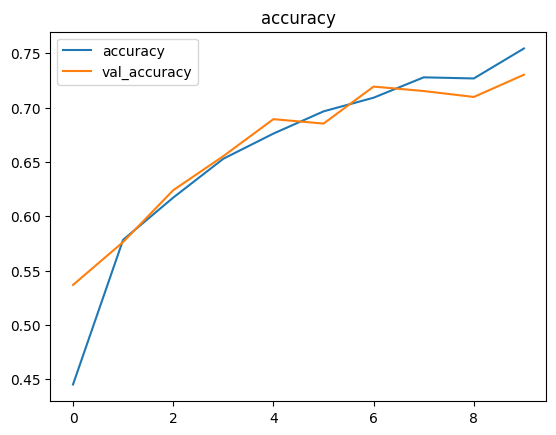

In [11]:
plt.plot(history2.history["loss"], label="loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()
plt.show()

plt.title("accuracy")
plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
